In [20]:
import numpy as np
import random
from implementations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
LOWER_BOUND = 0
UPPER_BOUND = 1

# Import data

In [52]:
DATA_FOLDER = "competition-data/"
DATA_TEST = "test.csv"
DATA_TRAIN = "train.csv"

In [53]:
from proj1_helpers import load_csv_data
y_train, x_train, ids_train = load_csv_data(DATA_FOLDER + DATA_TRAIN, LOWER_BOUND, UPPER_BOUND)
y_test, x_test, ids_test = load_csv_data(DATA_FOLDER + DATA_TEST, LOWER_BOUND, UPPER_BOUND)

In [54]:
x_train

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ...,      nan,      nan,   46.226],
       [     nan,  162.172,  125.953, ...,      nan,      nan,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ...,      nan,      nan,   41.992],
       [  94.951,   19.362,   68.812, ...,      nan,      nan,    0.   ],
       [     nan,   72.756,   70.831, ...,      nan,      nan,    0.   ]])

In [55]:
tx_train = x_train.T
tx_test = x_test.T

# Cleaning data

In [56]:
"""# constants
CATEGORICAL_FIELDS = ['PRI_jet_num']

for c in CATEGORICAL_FIELDS:
    median_rep_data_train[c] = categorical_rep_data(train_data[c])
    median_rep_data_test[c] = categorical_rep_data(test_data[c])"""

"# constants\nCATEGORICAL_FIELDS = ['PRI_jet_num']\n\nfor c in CATEGORICAL_FIELDS:\n    median_rep_data_train[c] = categorical_rep_data(train_data[c])\n    median_rep_data_test[c] = categorical_rep_data(test_data[c])"

In [57]:
tx_train = delete_features(tx_train, 0.9)
tx_train.shape

(30, 250000)

In [58]:
tx_train = replace_nan_by_median(tx_train)
tx_test = replace_nan_by_median(tx_test)

In [59]:
#tx_train = min_max(tx_train)

In [60]:
mean_train, std_train, tx_train = standardize(tx_train)
tx_test = standardize_predef(tx_test, mean_train, std_train)

In [61]:
tx_train, y_train = balance(tx_train.T, y_train, LOWER_BOUND, UPPER_BOUND)

# Logistic Regression

In [75]:
tx_train
tx_train.shape

(30, 171334)

In [80]:
tx_poly = build_poly_tx(tx_train, 2)
tx_poly.shape

(61, 171334)

# Cross Validation

Finished: (1, 0.0, 0.001, 0.57167454619739688)


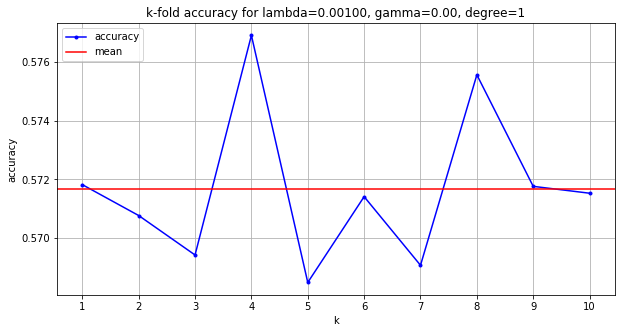

KeyboardInterrupt: 

In [81]:
from implementations import build_k_indices
#from tqdm import tqdm_notebook
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

def cross_validation_demo():
    model = "logistic_regression"
    seed = 3
    k_fold = 10
    degrees = np.arange(1, 10, 1)
    lambdas = np.logspace(-3, 0, 10)
    gammas = np.arange(0.0, 1.0, 0.05)
    #initial_w = init_w(tx_train)
    max_iters = 300
    k_indices = build_k_indices(y_train, k_fold, seed)
    results = []
    for degree in degrees:
        tx_poly = build_poly_tx(tx_train, degree)
        initial_w = init_w(tx_poly)
        for gamma in gammas:
            for lambda_ in lambdas:
                accs = []
                ws = []
                for k in range(k_fold):
                    w_tr, acc = cross_validation(y_train, tx_poly.T, initial_w,
                                                 max_iters,  k_indices, k, gamma, lambda_, LOWER_BOUND, UPPER_BOUND, model)
                    ws.append(w_tr)
                    accs.append(acc)
                w_final = np.mean(ws, axis=0)
                acc_mean = np.mean(accs)
                results.append((degree, gamma, lambda_, acc_mean))
                
                print("Finished: " + str((degree, gamma, lambda_, acc_mean)))

                fig = plt.subplots(1, 1, figsize=(10,5))
                plt.plot(range(1,k_fold+1), accs, marker=".", color='b', label='accuracy')
                plt.axhline(y=acc_mean, color='r', label='mean')
                ax = plt.gca()
                ax.xaxis.set_major_locator(MaxNLocator(integer=True))
                plt.xlabel("k")
                plt.ylabel("accuracy")
                plt.title("k-fold accuracy for lambda=%.5f, gamma=%.2f, degree=%d" % (lambda_, gamma, degree))
                plt.legend(loc=2)
                plt.grid(True)
                plt.show()
    
    print(results)
    best_lambda, best_acc_mean = max(results, lambda x: x[2])
    print("Best accuracy: " + best_acc_mean)
    print("Best lambda: " + best_lambda)
    #print(w_tr)
    
    return w_final

w_final = cross_validation_demo()

# Predict labels

In [35]:
from proj1_helpers import predict_labels_kaggle

In [46]:
y_pred = predict_labels_kaggle(w_final, tx_test.T, LOWER_BOUND, UPPER_BOUND)

# Submission

In [47]:
from proj1_helpers import create_csv_submission

In [48]:
create_csv_submission(ids_test, y_pred, "test11.csv")

Test n : algorithm / features / y / w
- - - - - - - - - - - - - - - - - - - 
Test 1 : least_squares / all features standardized / y = -1,1 / random init_w

Test 2 : least_squares / corr > 0.1 features standardized / y = -1,1 / random init_w

Test 3 : least_squares_GD(10000,0.5) / all features standardized / y = -1,1 / random init_w

Test 4 : least_squares_GD(10000,0.5) / all features standardized / y = -1,1 / random init_w / poly, degree=1

Test 5 : least_squares / all features standardized / y = -1,1 / random init_w / median + categorical

Test 6 : logistic_regressoin  /all features standardized / y = 0,1 / random init_w / median + categorical + balanced

Test 7 : least_squares / all features standardized / y = 0,1 / random init_w

Test 8 : Test 1

Test 9 : Test 1

Test 10 : Test 1 / standardized test_set with mean and std from train_set

Test 11 : Test 1 / standardized test_set with mean and std from train_set / balance

## Further work

- balance output (batch numpy)
- median and category
- features engineering : features d'intéraction
- logistic regression 